In [ ]:
# importing packages
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
df = sns.load_dataset("penguins")
df = df.dropna(axis="index", how="any", inplace=False) #dropping rows that contain >= 1 missing value 
df.isnull().sum() #sanity check
df.shape


# Visualizing distributions of our 🐧 data 

For today, we will mostly stick to `seaborn` and its [distributions module](https://seaborn.pydata.org/api.html#distribution-api). By plotting the distribution of our data, we can get quick answers to many questions: 
- what is the central tendecy of our data
- are my values in a plausible (or expected) range
- is my data skewed or contains outliers
.. and many more.



## Plotting univariate distributions 

Lets use an `histogram` to visualize the distribution of our penguins flipper length. `Seaborn` offers multiple solutions, with `sns.displot` being one of them. 

Note: The bin size is usually automatically set for you based on the variance and number of observations - however this might sometimes lead to non-optimal results, eg. if you only have a relatively small number of observations per instance. To change that, we can either use the `bins=xx`or `binwidth=xx` parameter.

Use the `sns.displot` function to create the figures below. See which number you need to input to `bins` to get the same results. 

|Figure 1 | Figure 2|
|-|-|
![alt](figures/day2-1.png) | ![alt](figures/day2-2.png)

In [ ]:
# figure 1
sns.displot(df, x="flipper_length_mm") #uses the same code as sns.histplot()

# figure 2
sns.displot(df, x="flipper_length_mm", bins=25)

Lets try to break down the `flipper_length` distribution by `species`. 

Try to recreate the following graphs:
Note: Figure 3 may not make much sense, it is merely for repetition.

|Figure 1 | Figure 2 | Figure 3|
|-|-|-|
![alt](figures/day2-3.png) | ![alt](figures/day2-4.png) | ![alt](figures/day2-5.png) |

In [ ]:
#figure 1
sns.displot(df, x="flipper_length_mm", hue="species")
#figure 2
#sns.displot(df, x="body_mass_g", hue="species")
#figure 3
#sns.displot(df, x="body_mass_g", hue="species", row="sex", col='island')

Sometimes, these visualizations make it difficult to disentangle each distribution. 
`Seaborn` offer seversal solutions to potentially overcome this:
- use `element="step"` to change to a step-plot
- use `multiple="stack"` to stack multiple distributions
- use `multiple="dodge"` to create non-overlapping bars.

Try some of these arguments and think about the pros and cons of each option!


###❗Note❗
If your groups have unequal number of observations, comparing distributions might not be ideal. For that `seaborn` offers different ways to normalize you data by using the `stat` argument. 

By default, however, the normalization is applied to the entire distribution, so this simply rescales the height of the bars. By setting `common_norm=False`, each subset will be normalized independently

Try to recreate the following graphs (both use the `element="step"` argument):

|Figure 1 | Figure 2 |
|-|-|
![alt](figures/day2-6.png) | ![alt](figures/day2-7.png) |

In [ ]:
sns.displot(df, x="flipper_length_mm", hue="species", element="step") #step plot

Now try to recreate the figures below using `multiple=...`:

|Figure 1 | Figure 2 |
|-|-|
![alt](figures/day2-8.png) | ![alt](figures/day2-9.png) |

In [ ]:
sns.displot(df, x="flipper_length_mm", hue="species", multiple="stack") #stack bins onto each other

In [ ]:
sns.displot(df, x="flipper_length_mm", hue="species", multiple="dodge") #no overlap, works fine for a small number of levels

# Kernel Density estimation

A different way to plot distributions are `KDE Plots`. Instead of using discrete bins, `KDE` smoothes the observations with a `Gaussian Kernel` and thus produces a continous estimation.

Conveniently, `sns.displot` can be also used to create `KDE` plots by setting the `kind` parameter to `kde`.
The smoothing bandwith relies on the `bw_adjust`, where one needs to find a good balance between under- and oversmoothing.


### ❗Note❗
- `KDE` plots might not be suitable for variables that are naturally bounded, e.g. a `bill at the restaurant` is usually > 0€. For this situation, the tails of the Gaussian might expand to < 0, which simply does not reflect the data properly. The `cut` and `clip` parameters can be used to control the extent of the curve, but datasets that have many observations close to a natural boundary may be better served by a different visualization method.
- Moreover `KDE` always returns a smooth curve, even if ther underlying data is not.

/Users/philis/anaconda3/envs/longi_modelling/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


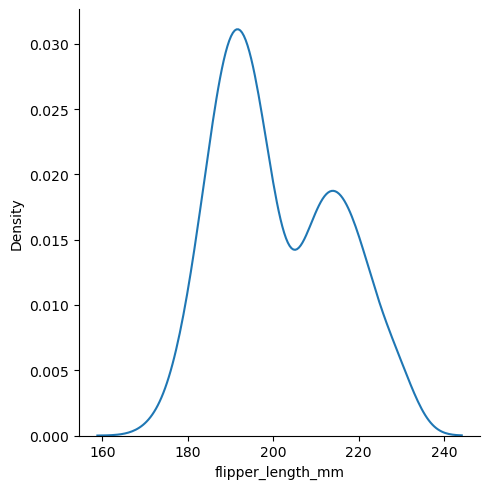

In [107]:
sns.displot(df, x="flipper_length_mm", kind="kde")

### try to play around with the bw_adjust parameter and see how it affects the bimodality

Since we are using the same `sns.displot` functionality, we can use all features already described above, for example, `stacked KDE plots`.
Try recreating this figure:
![alt](figures/day2-10.png)

In [ ]:
sns.displot(df, x="flipper_length_mm", hue="species", kind="kde", multiple="stack") # try using fill=True instead of multiple="stack"

Now, we've used the `displot` function at the moment and used the `kind=...` argument to switch between different types.
As mentioned above you can also use the `histplot` function. The `histplot` function has the advantage, that you can overlay the `kde` _onto_ the histogram itself.
Using `histplot` try to recreate the following figures:

|Figure 1 | Figure 2 |
|-|-|
![alt](figures/day2-11.png) | ![alt](figures/day2-12.png) |

In [ ]:
plt.figure(figsize=(4,4))
sns.histplot(data=df, x='flipper_length_mm', kde=True)

plt.figure(figsize=(4,4))
sns.histplot(data=df, x='flipper_length_mm', hue='species', bins=25, kde=True)

# Plotting distributions of categorical data 

Beyond visualizing univariate distributions, we are often also interested whether distributions are different between groups. Comparing distributions can be achieved using for example:
- boxplots
- violinplots

For that, we can use the `sns.catplot` or `sns.boxplot` functionality. You'll also need another argument for the plot: `palette`. The colors for the following figure are within the `vlag` palette. 

First lets boxplot our 🐧s flipper length as a function of species:

This is what your figure should look like:

![alt](figures/day2-13.png)

In [ ]:
sns.catplot(data=df, x="species", y="flipper_length_mm", kind="box", palette="vlag") # equivalent to sns.boxplot(data=df, x="species", y="flipper_length_mm", palette="vlag")

❗However, since `boxplots` show summary stats, some interesting features of the data might be hidden. See for example how different data leads to the same `boxplot`❗

See here: 
- https://stats.stackexchange.com/questions/135737/will-two-distributions-with-identical-5-number-summaries-always-have-the-same-sh
- https://en.wikipedia.org/wiki/Anscombe%27s_quartet

To alleviate this problem we can simply overlay single datapoints on the box plots. Like this: 

![alt](figures/day2-14.png)

This can be easily achived by using the `sns.stripplot` function:

In [ ]:
sns.catplot(data=df, x="species", y="flipper_length_mm", kind="box", palette="vlag")
sns.stripplot(data=df, x="species", y="flipper_length_mm", color="black") #try to overlay our boxplot with our data points in black 

But what if we have categories within categories? We have the `sex` category for each species. Using `hue` again, we can separate our plot even further. What about the stripplot then though. Can you create a figure like the one below? 

![alt](figures/day2-15.png)

You'll probably run into something weird at first. The individual datapoints seem to be mixed. Curious!
Hint: check the help (`sns.stripplot?`). Can you find an argument that helps you in separating male and female dots?

Another hint: You'll likely have males and females twice in your _legend_. Check if you can find out what the `legend` argument does in `sns.stripplot`.

In [ ]:
sns.catplot(data=df, x="species", y="flipper_length_mm", hue="sex", kind="box", palette="vlag")
sns.stripplot(data=df, x="species", y="flipper_length_mm", hue="sex", dodge=True, palette="gray", legend=False)

Seeing the individual data points is already much better, but we can also go one step further and combine a `boxplot` with a `KDE` and use `sns.violinplot`.
Now using `sns.catplot` comes in handy, as we only need to adjust the `kind` parameter.

The `violinpot` shows the distribution of the data, as well as the whisker and quartiles of the boxplot inside the violin. Keep in mind, that since the `violinplot` also contains a `KDE`, you might also want to check additional parameters, such as the bandwith (ie `bw`).

In [ ]:
sns.catplot(data=df, x="species", y="flipper_length_mm", kind="violin", palette="vlag") # see also sns.violinplot()
# try to adjust the bw parameter and see how it affects your violins


Now try to plot the `violinplot` again but with `x- and y-axis` being switched. Additionally try to also incorporate the `sex` information and find a way that you will end up having 3 and not 6 (3 species * 2 sex) violins. 

Your plot should look something like this (using `viridis_r` as your `palette`):

![alt](figures/day2-16.png)

In [ ]:
sns.catplot(data=df, y="species", x="flipper_length_mm", kind="violin", 
            palette="viridis_r", hue="sex", split=True, height=8, aspect=1) 

### Note
Using `sns.catplot()` with different `kind` parameters come with a certain advantage, ie., we can very easily introduce additional variables to split our data and investigate higher-order relationship. Yesterday we did the same thing using `sns.lmplot` in which we split the data for `species` and within each species stratified our plot for `sex`.

This is called a [Facetgrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) and allows you to plot something like: 

In [ ]:
sns.catplot(data=df, x="sex", y="flipper_length_mm", kind="violin", 
            palette="viridis_r", col="species", height=4, aspect=0.8) #Note that Facetgrids can be sized with the height and aspect parameter!

# Other useful plots to visualize distributions

- `sns.jointplot` combines a `scatterplot` with `marginal distributions`
- barplots, using `sns.catplot` with `kind=bar` (see [documentation](https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot) )
- `sns.displot` with two variables (x,y) for bivariate distributions
- `sns.pairplot` to visualize the relationship between all variables + their distributions in a dataframe (see [documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot))

In [ ]:
sns.jointplot(data=df, x="bill_length_mm", y="body_mass_g", hue="sex", palette="coolwarm")

Using `pairplot`, recreate the following figure - and don't worry. It is really easy and quick:

![alt](figures/day2-17.png)

In [ ]:
sns.pairplot(df, hue="species") #try to incorporate species again